# Gradient descent
#### Author: Kirill Zakharov
##### Date: 13.07.20

In [21]:
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [22]:
def f(x, y): #initial function
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2
    
    

def partialX(f, x, y, d): #take the partial derivative by X
    return (f(x + d, y) - f(x, y))/d

def partialY(f, x, y, d): #take the partial derivative by Y
    return (f(x, y + d) - f(x, y))/d

def grad(f, x, y, d): #function for finding the gradient
    x0 = partialX(f, x, y, d)
    y0 = partialY(f, x, y, d)
    return (x0, y0) #output is the vector of patial derivatives

def dyh(f, a, b, k):
    array = [] #empty array for roots
    minf = 0
    d = 0.001
    for i in range(k):
        x1 = (a+b-d)/2
        x2 = (a+b+d)/2
        if f(x1) > f(x2): #main condition
            a = x1
            array.append(a)  
        else:
            b = x2
            array.append(b)
        
    minf = (a+b)/2 #result
    return minf, array #the minimum and the list of the roots 

def grad_descent(f, x, y, step, eps, d, max_iter):
    iters = 0
    x0 = x
    y0 = y
    xmin = x0 - step*partialX(f, x0, y0, d)
    ymin = y0 - step*partialY(f, x0, y0, d)
    minf = (xmin, ymin)
    array = [minf]
    
    while abs(abs(f(x0, y0)) - abs(f(xmin, ymin))) > eps and iters < 1000:
        x0 = xmin
        y0 = ymin
        g = grad(f, x0, y0, d)
        
        xmin = x0 - step*g[0] #calculate the x component of the gradient
        ymin = y0 - step*g[1] #calculate the y component of the gradient
        
        iters += 1
#         step = dyh(lambda x: f(x0 - x*g[0], y0 - x*g[1]), 0, 1, 30)[0] #calculate the gd step by unconditional optimization
        
        array.append((xmin, ymin)) #array of every steps
        minf = (xmin, ymin)
    return minf, iters, array


In [23]:
step = 0.01
eps = 10**(-7)
d = 0.001
max_iter = 1000
minf, iters, array = grad_descent(f, 0.7, 1.4, step, eps, d, max_iter)
print(f"Iterations: {iters}\nMinimum: {minf}")

Iterations: 1000
Minimum: (2.9636485142231574, 0.4903210597111468)


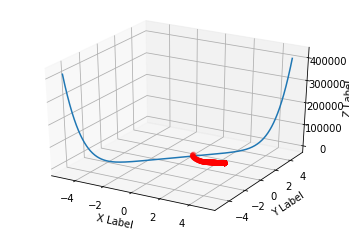

In [24]:
res = np.array(array).T          #transpose array
val = list(map(f,res[0],res[1])) #the values of the function in points
xs = list(res[0])
ys = list(res[1])
zs = val

x1 = np.linspace(-5,5,num=1000)
y1 = np.linspace(-5,5,num=1000)
z1 = list(map(f, x1, y1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, y1, z1)
ax.scatter(xs, ys, zs, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### Visualiztion with fixed minimal Y

In [25]:
resY = []
for _ in range(len(res[1])):
    resY.append(minf[1])
f_fixY = list(map(f,res[0], resY))
resY2 = []
for _ in range(len(x1)):
    resY2.append(minf[1])
f_fullY = list(map(f,x1, resY2))

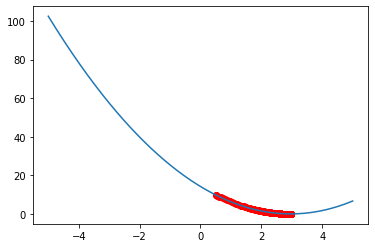

In [26]:
plt.scatter(xs, f_fixY, c='r')
plt.plot(x1, f_fullY)

### Visualiztion with fixed minimal X

In [27]:
resX = []
for _ in range(len(res[0])):
    resX.append(minf[0])
f_fixX = list(map(f,resX, res[1]))
resX2 = []
for _ in range(len(y1)):
    resX2.append(minf[0])
f_fullX = list(map(f,resX2, y1))

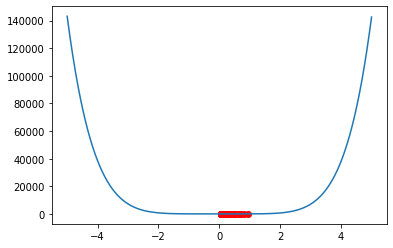

In [28]:
plt.scatter(ys, f_fixX, c='r')
plt.plot(y1, f_fullX)